In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.read_csv('./hotel_bookings.csv') 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119390,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119391,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119392,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [4]:
data = pd.read_csv('./hotel_bookings.csv') 

In [5]:
print(data.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [6]:
# Filter Data for Resort Hotel only, showing desired categories 
data.iloc[:40063]
data[['adults', 'children', 'babies', 'meal']]

,adults,children,babies,meal
0,2,0.0,0,BB
1,2,0.0,0,BB
2,1,0.0,0,BB
3,1,0.0,0,BB
4,2,0.0,0,BB
...,...,...,...,...
119389,2,0.0,0,BB
119390,3,0.0,0,BB
119391,2,0.0,0,BB
119392,2,0.0,0,BB


In [7]:
# Filter out data which is in an undefined category 
data = data[data['meal'] != 'Undefined']


In [8]:
# Replace abbreviations with full word for clarity.
data['meal'] = data['meal'].replace('FB','Full-Board') 
data['meal'] = data['meal'].replace('SC','Self-Catered')
data['meal'] = data['meal'].replace('HB','Half-Board')                                  
data['meal'] = data['meal'].replace('BB','Bed and Breakfast')

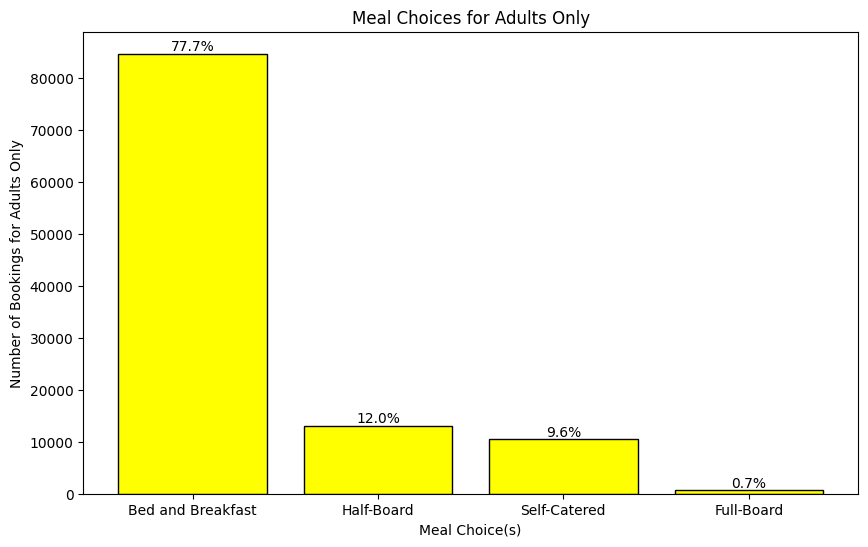

In [9]:
# Filter data for only adults (no children or babies)

adults_only = data[(data['children'] == 0) & (data['babies'] == 0)]

# Count the number of adult bookings for each meal type

meal_counts = adults_only['meal'].value_counts()

# Get total number of bookings after cleaning undefined data out of dataset
total_bookings = meal_counts.sum()

# Calculate percentage for each category
percentage = (meal_counts / total_bookings) * 100  # Define percentage

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(meal_counts.index, meal_counts.values, color='yellow', edgecolor='black')

# Annotate bars with percentage values (aligned at the top of the bars)
for bar, percentage_value in zip(bars, percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{percentage_value:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.title('Meal Choices for Adults Only')
plt.xlabel('Meal Choice(s)')
plt.ylabel('Number of Bookings for Adults Only')

# Show plot
plt.show()

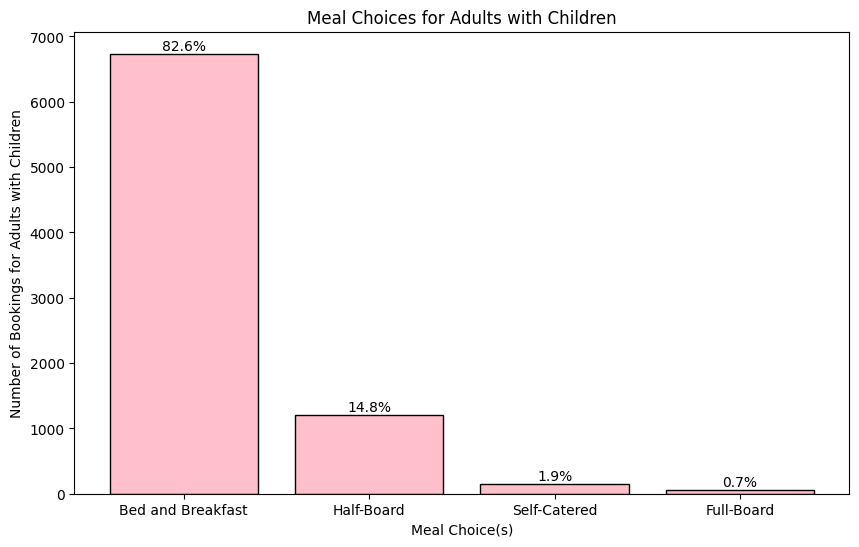

In [10]:
# Filter data for adults with children only (excluding babies)
adults_with_children = data[(data['adults'] > 0) & (data['children'] > 0) & (data['babies'] == 0)]

# Count the number of bookings for each meal type
meal_counts = adults_with_children['meal'].value_counts()

# Get total number of bookings after cleaning undefined data out of dataset
total_bookings = meal_counts.sum()

# Calculate percentage for each category
percentage = (meal_counts / total_bookings) * 100  # Define percentage

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(meal_counts.index, meal_counts.values, color='pink', edgecolor='black')

# Annotate bars with percentage values (aligned at the top of the bars)
for bar, percentage_value in zip(bars, percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(),  
             f'{percentage_value:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# Labels and titles
plt.title('Meal Choices for Adults with Children')
plt.xlabel('Meal Choice(s)')
plt.ylabel('Number of Bookings for Adults with Children')

# Show plot
plt.show()

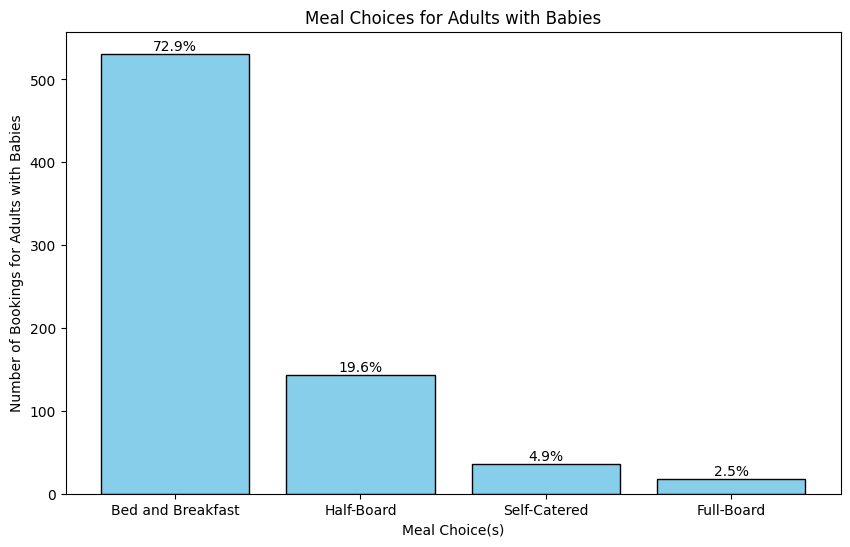

In [11]:
# Filter data for adults with babies only (excluding children)
adults_with_babies = data[(data['adults'] > 0) & (data['babies'] > 0) & (data['children'] == 0)]

# Count the number of bookings for each meal type
meal_counts = adults_with_babies['meal'].value_counts()

# Get total number of bookings after cleaning undefined data out of dataset
total_bookings = meal_counts.sum()

# Calculate percentage for each category
percentage = (meal_counts / total_bookings) * 100  

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(meal_counts.index, meal_counts.values, color='skyblue', edgecolor='black')

# Annotate bars with percentage values (aligned at the top of the bars)
for bar, percentage_value in zip(bars, percentage):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 1,  
             f'{percentage_value:.1f}%',
          ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.title('Meal Choices for Adults with Babies')
plt.xlabel('Meal Choice(s)')
plt.ylabel('Number of Bookings for Adults with Babies')

# Show plot
plt.show()

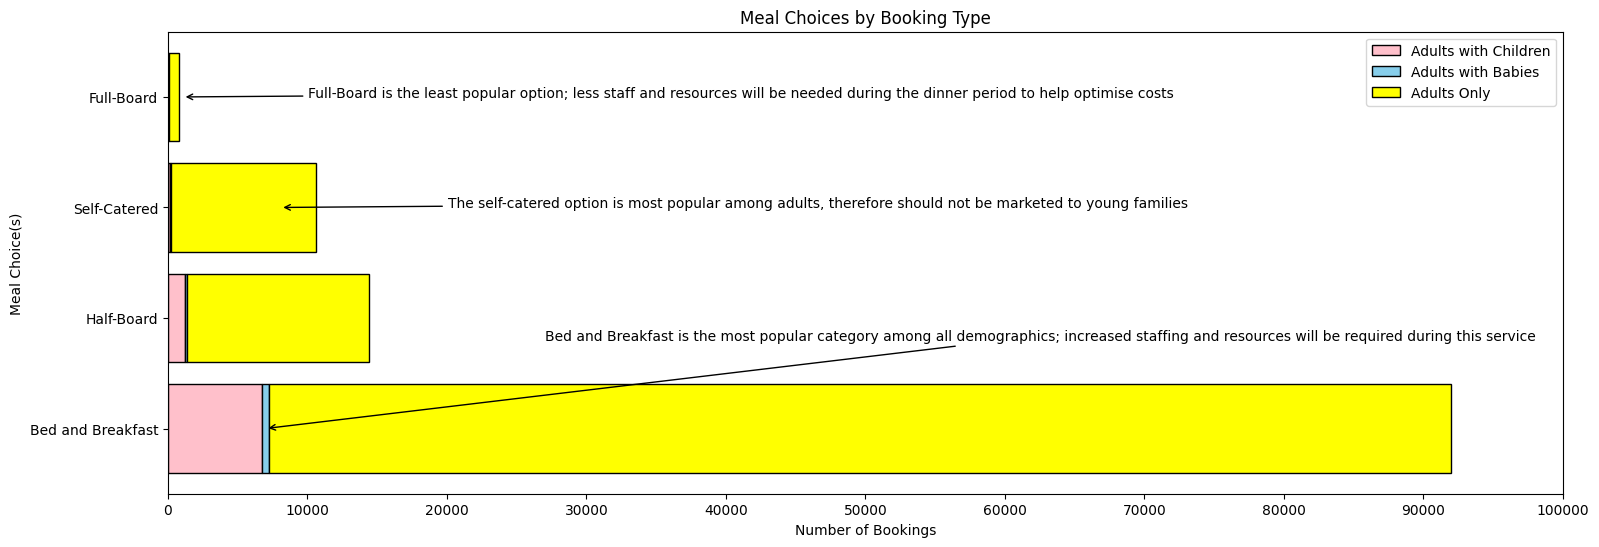

In [12]:
# Filter data for each category
adults_with_children = data[(data['adults'] > 0) & (data['children'] > 0) & (data['babies'] == 0)]
adults_with_babies = data[(data['adults'] > 0) & (data['babies'] > 0) & (data['children'] == 0)]
adults_only = data[(data['children'] == 0) & (data['babies'] == 0)]

# Count meal types for each category
meal_counts_children = adults_with_children['meal'].value_counts()
meal_counts_babies = adults_with_babies['meal'].value_counts()
meal_counts_adults = adults_only['meal'].value_counts()

# Combine into a single DataFrame for easy comparison 
meal_counts = pd.DataFrame({
    'Adults with Children': meal_counts_children,
    'Adults with Babies': meal_counts_babies,
    'Adults Only': meal_counts_adults})

# Plot the data as a horizontal bar graph
fig, ax = plt.subplots(figsize=(18,6))

# Plot each category as a horizontal bar
ax.barh(meal_counts.index, meal_counts['Adults with Children'], color='pink', edgecolor='black', label='Adults with Children')
ax.barh(meal_counts.index, meal_counts['Adults with Babies'], color='skyblue', edgecolor='black', left=meal_counts['Adults with Children'], label='Adults with Babies')
ax.barh(meal_counts.index, meal_counts['Adults Only'], color='yellow', edgecolor='black', left=meal_counts['Adults with Children'] + meal_counts['Adults with Babies'], label='Adults Only')

# add arrows to highlight Bed and Breakfast Section:

meal_x = meal_counts['Adults with Children'].iloc[0] + meal_counts['Adults with Babies'].iloc[0]/2
meal_y = 0 

ax.annotate('Bed and Breakfast is the most popular category among all demographics; increased staffing and resources will be required during this service', 
              xy=(meal_x, meal_y),
              xytext = (meal_x + 20000, meal_y + 0.8), # offset text
              arrowprops = dict(facecolor = 'black', arrowstyle ='->'),
              fontsize = 10, color = 'black')

# add arrows to highlight the Self-Catered section
meal_a = meal_counts['Adults with Children'].iloc[3] + meal_counts['Adults with Babies'].iloc[3]/2
meal_b = 0 

ax.annotate('The self-catered option is most popular among adults, therefore should not be marketed to young families', 
              xy=(meal_a + 8000, meal_b + 2),
              xytext = (meal_a + 20000, meal_b + 2), # offset text
              arrowprops = dict(facecolor = 'black', arrowstyle ='->'),
              fontsize = 10, color = 'black')

# add arrows to highlight the Full-Board section
meal_c = meal_counts['Adults with Children'].iloc[3] + meal_counts['Adults with Babies'].iloc[3]/2
meal_d = 0 

ax.annotate('Full-Board is the least popular option; less staff and resources will be needed during the dinner period to help optimise costs', 
              xy=(meal_c + 1000, meal_d + 3),
              xytext = (meal_c + 10000, meal_d + 3), # offset text
              arrowprops = dict(facecolor = 'black', arrowstyle ='->'),
              fontsize = 10, color = 'black')

# space out the values on the x-axis 
ax.set_xticks(range(0, int(meal_counts.sum(axis = 1).max()) + 10000, 10000))


# Add labels and title
plt.title('Meal Choices by Booking Type')
plt.xlabel('Number of Bookings')
plt.ylabel('Meal Choice(s)')
plt.legend()

# Show the plot
plt.show()

### Business Question: To what extent does the booking demographic (adults, children, and babies) impact the choice of meal plan at the Resort Hotel?

This question warrants in-depth exploration, as understanding the relationship between booking demographics and meal plan preferences can help the resort optimise cost efficiencies. The dataset attributes — adults, children, babies, and meal choices —were crucial for identifying trends across booking types, enhancing the reliability of future meal plan marketing and resource allocation strategies. For instance, targeting young families with the self-catered meal option would prove illogical based on data insights, as bookings for adults alone are more likely to select this service. Instead, businesses should focus on promoting the breakfast and half-board options to adults with children and babies, as these offerings were most popular within the family segment, highlighting the relationship between the family demographic and convenience-oriented meal plans. 

However, while adults-only bookings still favoured self-catered and half-board options, these were significantly less preferred compared to the breakfast-only plan, demonstrating that the breakfast-only option was by far the most popular across all booking groups. This insight allows managers to optimise resource allocation by ensuring increased staffing during breakfast hours, while lunch and dinner services may require fewer tangible resources in the form of food produce and function use.


In [18]:
data['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119389   NaN
119390   NaN
119391   NaN
119392   NaN
119393   NaN
Name: company, Length: 118225, dtype: float64

In [20]:
data['stays_in_week_nights']

0         0
1         0
2         1
3         1
4         2
         ..
119389    5
119390    5
119391    5
119392    5
119393    7
Name: stays_in_week_nights, Length: 118225, dtype: int64

Overall mark: 67

#### Business Question
A relevant business question is identified and stated clearly. The importance of the question to the hotel industry is also well explained. Useful implications are derived based on the given data with logics and clear evidences. For more in-depth analysis, consider to explore more data attributes that may to do with the choice of meal plan, e.g. 'stays_in_week_nights' and 'stays_in_weekend_nights'.

<u>Very good</u>

#### Data
The attributes selected to answer the question is effective. The rationale of choosing the attributes: adults, children, babies and meal choices is clearly presented. Data filtering and conditioning are applied appropriately, showing good understanding of how to process a given dataset, though some variable re-mapping, for example, replacing abbreviations with full word, might not be necessary in the data analysis stage.

<u>Very good</u>

#### Visualization
Multiple plots are presented clearly with essential elements of titles, axis labels, ticks. Necessary legends and annotations are also provided for better understandability. Howver, all plots are bar charts, which is a bit repetitive. For the last plot, bar chart might not be the optimal way to visualize the findings. You can probably consider to use a pie chart instead, where the ratio of each group can be visualized more straightforwardly.

<u>Good</u>

#### Code
The code structure is clear overall with minimal errors, except that there is a minor issue in importing the data file (you can not use the file name that only exists in your machine when sharing the code with others). Comments for the code are presented where necessary. For better code readability, it is suggested to write code in separate cells according to their functionality. And try to not mix-up the code for data analysis with the code for plotting.

<u>Good</u>

In [21]:
(70 + 70 + 60 + 60) / 4

65.0